In [213]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import renders as rs
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

seed = 42

In [783]:
data = pd.read_csv("Example_Data-Table 1.csv")
data.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)
data['day'] = pd.to_datetime(data['day'], dayfirst=True)
data['site'] = data['site'].astype('category')
data['new_customer'].replace([0,1], ['returning','new'], inplace=True)
data['new_customer'].fillna('neither', inplace=True)
data['new_customer'] = data['new_customer'].astype('category')
data['platform'].fillna('Unknown', inplace=True)
data['platform'] = data['platform'].astype('category')
data['gross_sales'].fillna(0, inplace=True)
print data.dtypes
print data.head()

day                   datetime64[ns]
site                        category
new_customer                category
platform                    category
visits                         int64
distinct_sessions              int64
orders                         int64
gross_sales                  float64
bounces                        int64
add_to_cart                    int64
product_page_views             int64
search_page_views              int64
dtype: object
         day    site new_customer    platform  visits  distinct_sessions  \
0 2013-01-01    Acme          new     Android      24                 16   
1 2013-01-01    Acme          new  BlackBerry       0                  0   
2 2013-01-01  Sortly          new        iPad       0                  0   
3 2013-01-01    Acme          new     Windows     922                520   
4 2013-01-01   Botly          new     Android      11                 10   

   orders  gross_sales  bounces  add_to_cart  product_page_views  \
0      14       1

In [165]:
data['conversion_rate'] = pd.Series(data['orders'] / data['visits'], index=data.index)
data['bounce_rate'] = pd.Series(data['bounces'] / data['visits'], index=data.index)
data['add_to_cart_rate'] = pd.Series(data['add_to_cart'] / data['visits'], index=data.index)
data['conversion_rate'].fillna(0, inplace=True)
data['bounce_rate'].fillna(0, inplace=True)
data['add_to_cart_rate'].fillna(0, inplace=True)
print data.shape
print data.head()

(21061, 15)
         day    site new_customer    platform  visits  distinct_sessions  \
0 2013-01-01    Acme          new     Android      24                 16   
1 2013-01-01    Acme          new  BlackBerry       0                  0   
2 2013-01-01  Sortly          new        iPad       0                  0   
3 2013-01-01    Acme          new     Windows     922                520   
4 2013-01-01   Botly          new     Android      11                 10   

   orders  gross_sales  bounces  add_to_cart  product_page_views  \
0      14       1287.0        4           16                 104   
1       0         13.0        0            0                   1   
2       0         98.0        0            0                   0   
3     527      60753.0      149          610                3914   
4      11       1090.0        0           11                   4   

   search_page_views  conversion_rate  bounce_rate  add_to_cart_rate  
0                192         0.583333     0.166667 

In [202]:
display(data.describe())
#data.to_csv('processed.csv')

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views,conversion_rate,bounce_rate,add_to_cart_rate
count,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000,21061.000000
mean,1934.708039,1515.205024,62.378994,8983.284317,743.282085,166.250890,4358.198234,8584.187788,0.194310,0.299798,0.259098
std,7448.607191,5925.833287,260.279286,38623.987818,3154.697787,505.186834,14327.287354,31120.321365,0.318016,0.275098,0.329302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000
50%,24.000000,19.000000,0.000000,16.000000,5.000000,4.000000,53.000000,82.000000,0.000000,0.250000,0.091346
75%,360.000000,274.000000,7.000000,1055.000000,97.000000,43.000000,708.000000,1229.000000,0.250000,0.500000,0.444444
max,136057.000000,107104.000000,4916.000000,707642.000000,54512.000000,7924.000000,187601.000000,506629.000000,1.000000,1.000000,1.000000


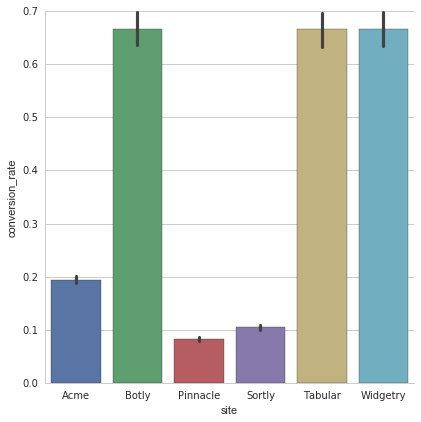

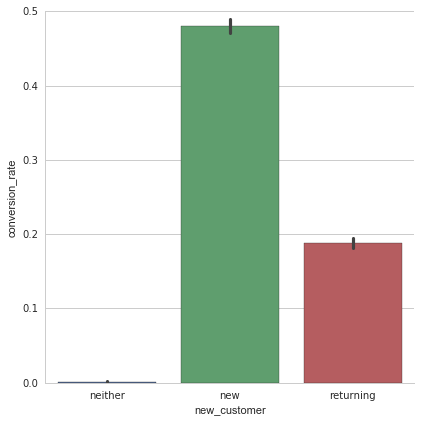

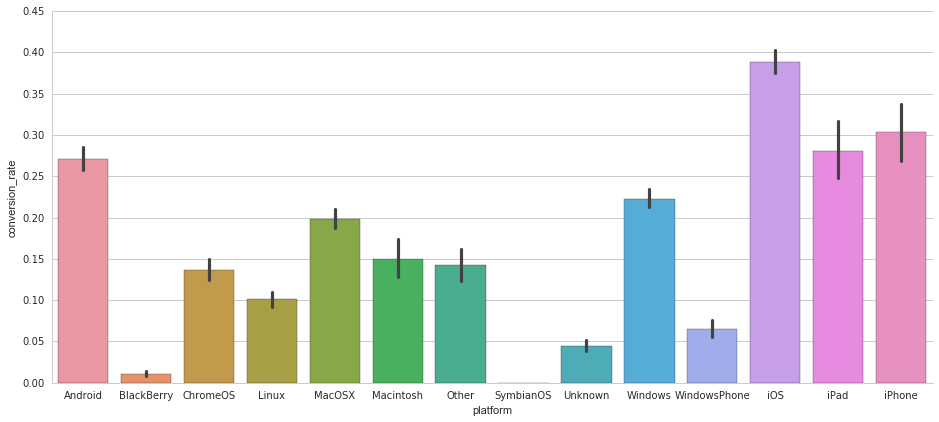

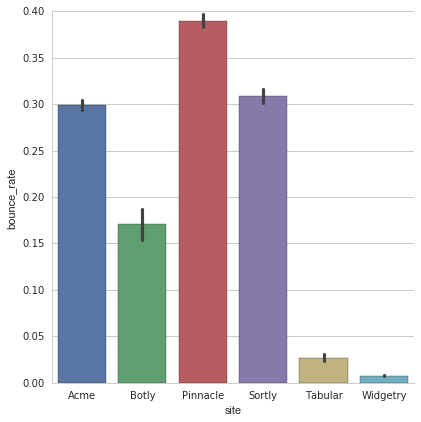

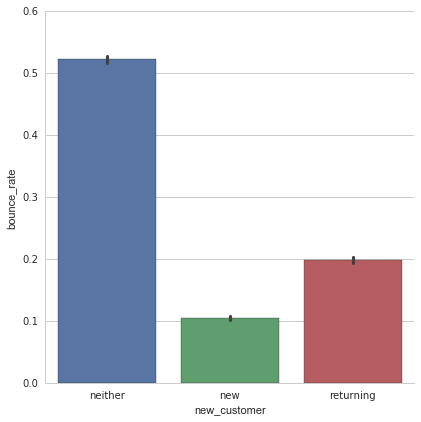

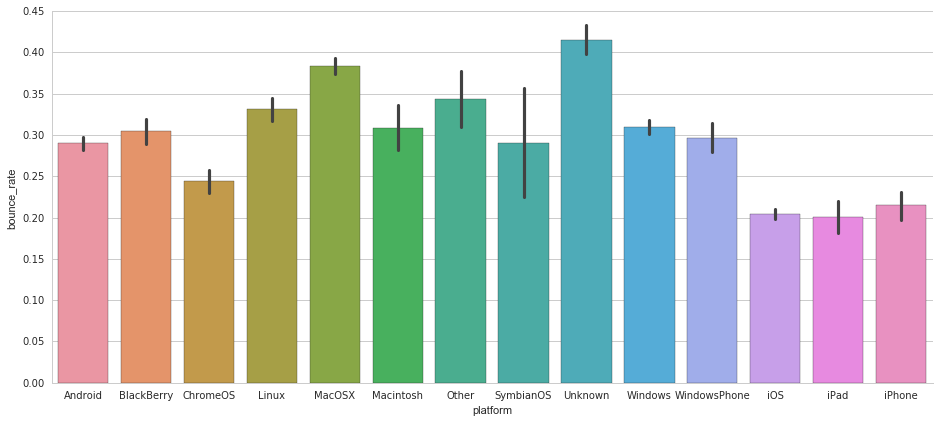

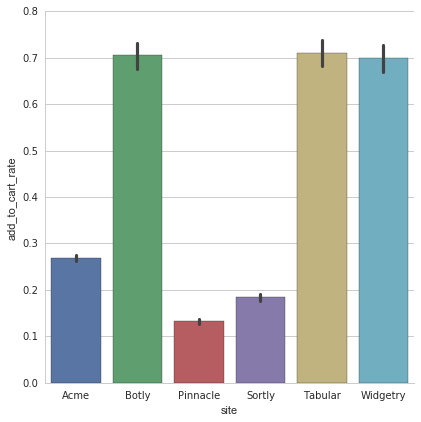

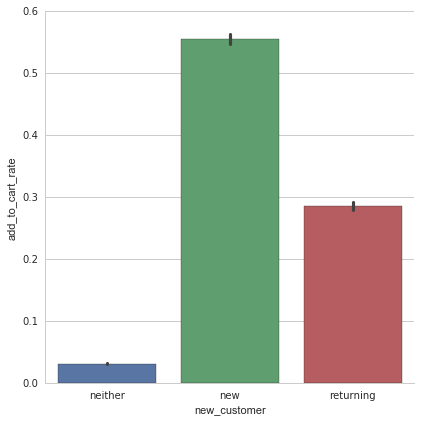

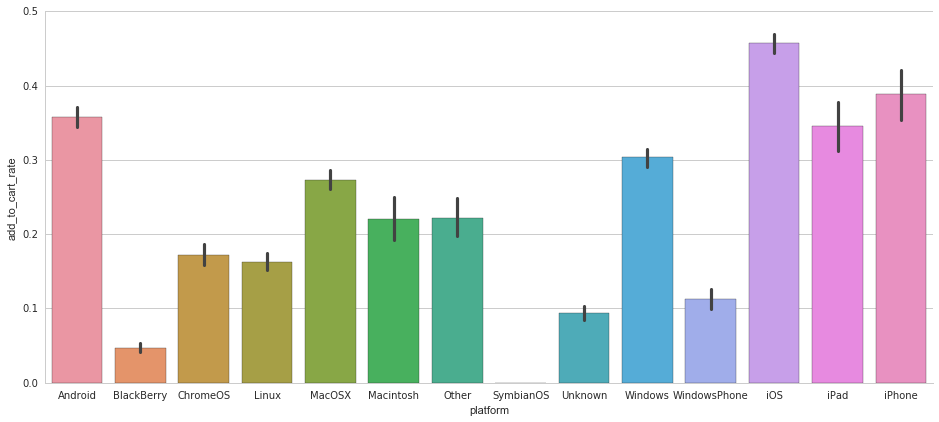

In [167]:
sns.set(style="whitegrid", color_codes=True)
g = sns.factorplot(x="site", y="conversion_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="conversion_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="conversion_rate", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="bounce_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="bounce_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="bounce_rate", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="add_to_cart_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="add_to_cart_rate", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="add_to_cart_rate", data=data, aspect=2.2,size=6, kind="bar")

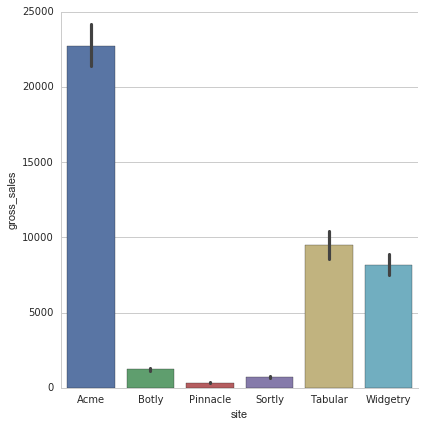

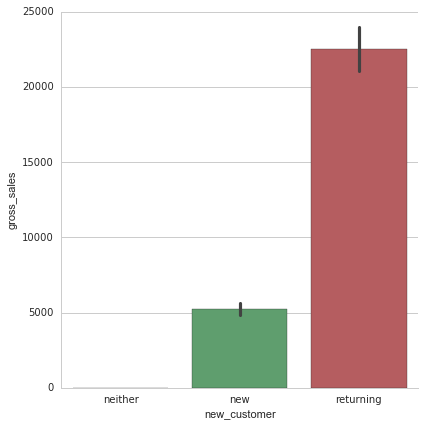

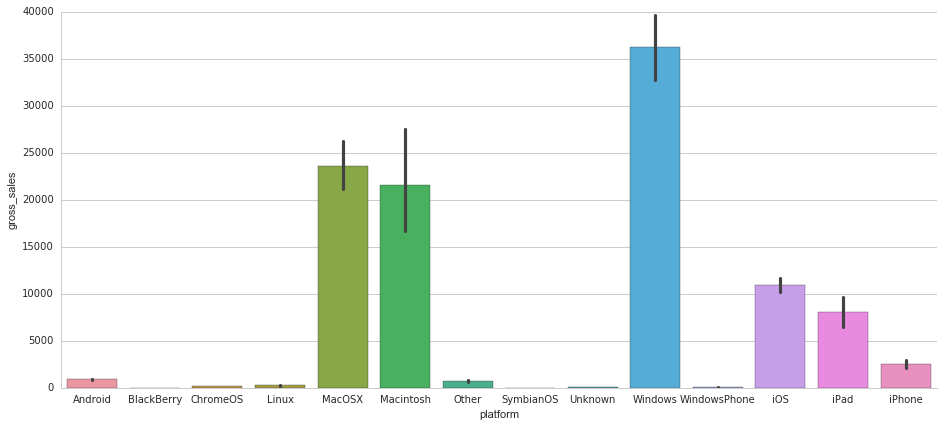

In [484]:
g = sns.factorplot(x="site", y="gross_sales", data=data, size=6, kind="bar")
g = sns.factorplot(x="new_customer", y="gross_sales", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="gross_sales", data=data, aspect=2.2,size=6, kind="bar")

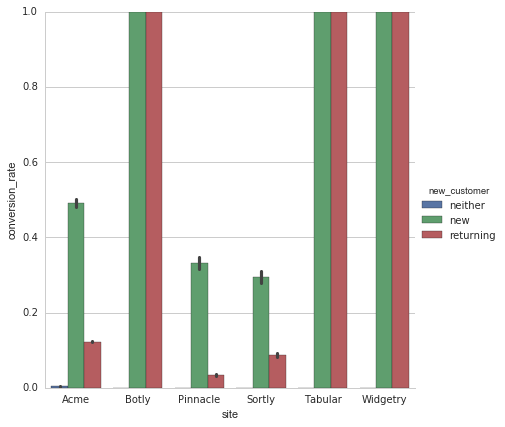

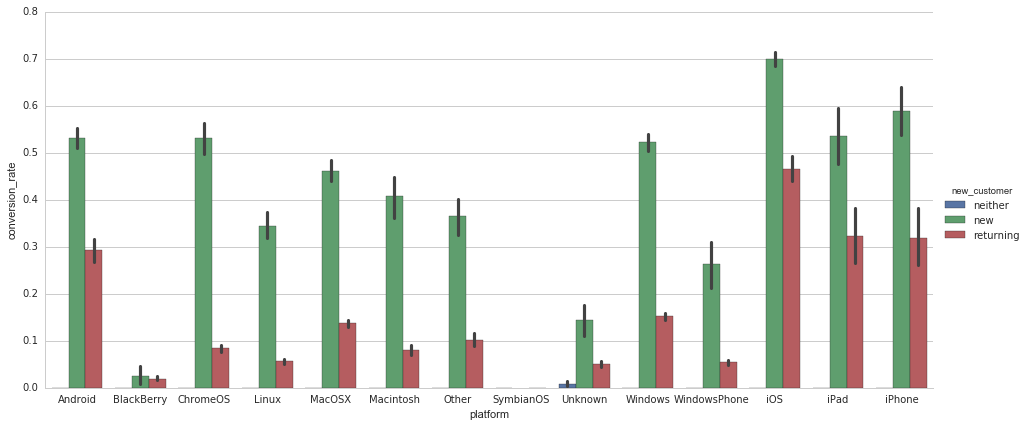

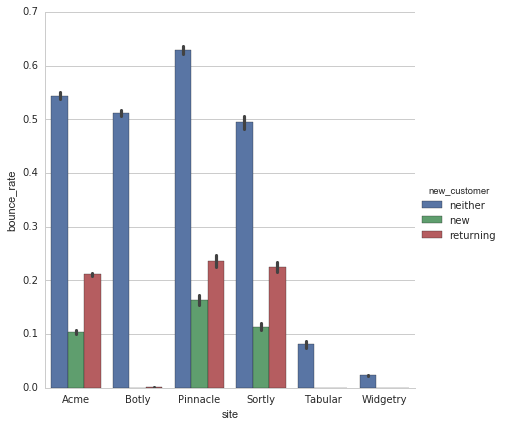

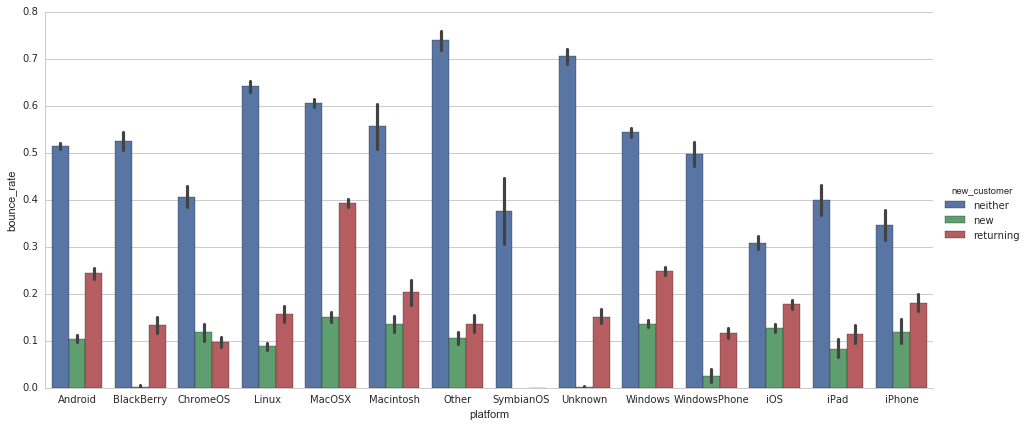

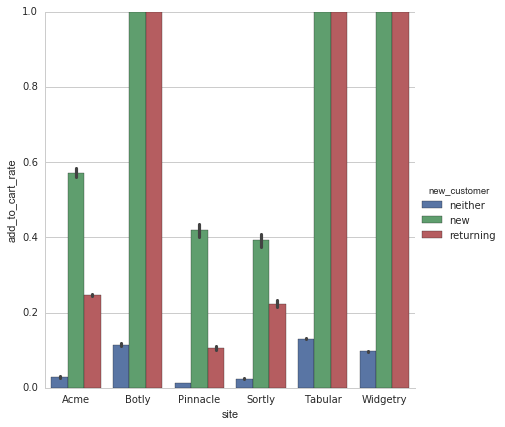

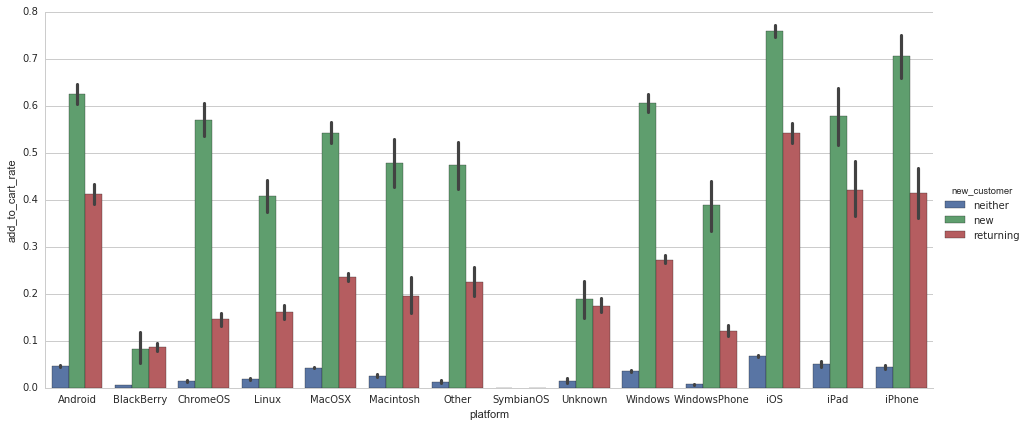

In [245]:
#data_reduce = data.drop(['conversion_rate', 'bounce_rate', 'add_to_cart_rate'], axis=1, inplace=False)
#g = sns.pairplot(data_reduce, hue='platform', diag_kind='kde')
#g = sns.pairplot(data_reduce, hue='site', diag_kind='kde')
#g = sns.pairplot(data_reduce, hue='new_customer', diag_kind='kde')
g = sns.factorplot(x="site", y="conversion_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="conversion_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="bounce_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="bounce_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")
g = sns.factorplot(x="site", y="add_to_cart_rate", hue="new_customer", data=data, size=6, kind="bar")
g = sns.factorplot(x="platform", y="add_to_cart_rate", hue="new_customer", data=data, aspect=2.2,size=6, kind="bar")

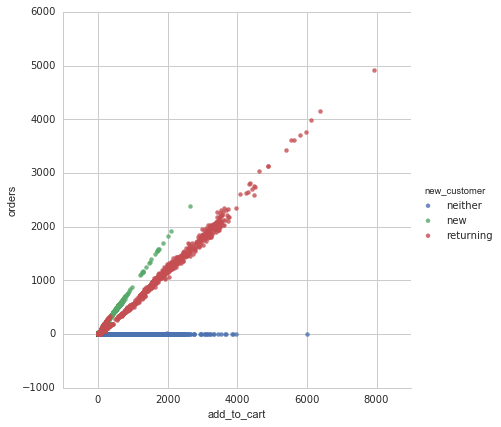

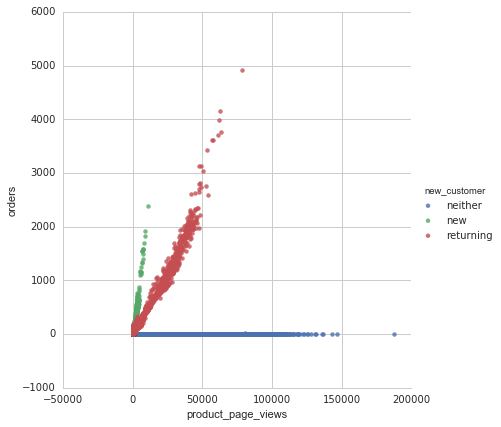

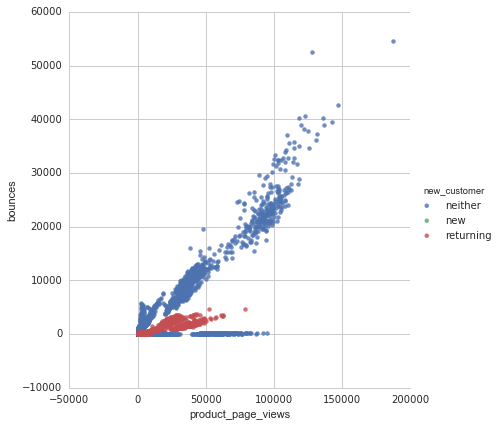

In [262]:
sns.lmplot(x="add_to_cart", y="orders", hue="new_customer", fit_reg=False, data=data, size=6,);
sns.lmplot(x="product_page_views", y="orders", hue="new_customer", fit_reg=False, data=data, size=6,);
sns.lmplot(x="product_page_views", y="bounces", hue="new_customer", fit_reg=False, data=data, size=6,);

# Supervised Learning: Classification

In [743]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from matplotlib.pylab import rcParams

In [764]:
data['spent'] = pd.Series((data['gross_sales'] != 0).astype(int), index=data.index)
data_reduce1 = data.drop(['day', 'new_customer', 'gross_sales', 'conversion_rate', 'bounce_rate', 'add_to_cart_rate'],
                         axis=1, inplace=False)
feature_cols = list(data_reduce1.columns[:-1])
target_col = data_reduce1.columns[-1] 
X_all = data_reduce1[feature_cols]
y_all = data_reduce1[target_col]

In [765]:
a = pd.get_dummies(X_all['site'], prefix='site')
#b = pd.get_dummies(X_all['new_customer'], prefix='new_customer')
b = pd.get_dummies(X_all['platform'], prefix='platform')
X_all = pd.concat([X_all, a, b], axis=1)
X_all.drop(['orders', 'site', 'platform'], axis=1, inplace=True)
X_all.dtypes

visits                     int64
distinct_sessions          int64
bounces                    int64
add_to_cart                int64
product_page_views         int64
search_page_views          int64
site_Acme                float64
site_Botly               float64
site_Pinnacle            float64
site_Sortly              float64
site_Tabular             float64
site_Widgetry            float64
platform_Android         float64
platform_BlackBerry      float64
platform_ChromeOS        float64
platform_Linux           float64
platform_MacOSX          float64
platform_Macintosh       float64
platform_Other           float64
platform_SymbianOS       float64
platform_Unknown         float64
platform_Windows         float64
platform_WindowsPhone    float64
platform_iOS             float64
platform_iPad            float64
platform_iPhone          float64
dtype: object

In [766]:
for i in [1,2,3,4,5,6,7]:
    X_all[[i]] = pd.Series(preprocessing.robust_scale(X_all[[i]])[:,0], index=X_all.index)
    

In [767]:
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (26 total features):
['visits', 'distinct_sessions', 'bounces', 'add_to_cart', 'product_page_views', 'search_page_views', 'site_Acme', 'site_Botly', 'site_Pinnacle', 'site_Sortly', 'site_Tabular', 'site_Widgetry', 'platform_Android', 'platform_BlackBerry', 'platform_ChromeOS', 'platform_Linux', 'platform_MacOSX', 'platform_Macintosh', 'platform_Other', 'platform_SymbianOS', 'platform_Unknown', 'platform_Windows', 'platform_WindowsPhone', 'platform_iOS', 'platform_iPad', 'platform_iPhone']


In [768]:
train_index, test_index = next(iter(StratifiedShuffleSplit(y_all,test_size=0.25,random_state=seed)))
X_train, X_test = np.array(X_all)[train_index,:], np.array(X_all)[test_index,:]
y_train, y_test = y_all[train_index], y_all[test_index]

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 15795 samples.
Testing set has 5266 samples.


In [769]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    clf.fit(X_train, y_train)
    print "AUC score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "AUC score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return roc_auc_score(target, y_pred)

In [770]:
clf_A = RandomForestClassifier(random_state=seed)
clf_B = ExtraTreesClassifier(random_state=seed)
clf_C = BaggingClassifier(SVC(random_state=seed), random_state=seed)
clf_D = BaggingClassifier(KNeighborsClassifier(), random_state=seed)
clf_E = LogisticRegression(random_state=seed)

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)
train_predict(clf_D, X_train, y_train, X_test, y_test)
train_predict(clf_E, X_train, y_train, X_test, y_test)

Training a RandomForestClassifier using a training set size of 15795. . .
AUC score for training set: 0.9709.
AUC score for test set: 0.9508.
Training a ExtraTreesClassifier using a training set size of 15795. . .
AUC score for training set: 0.9734.
AUC score for test set: 0.9470.
Training a BaggingClassifier using a training set size of 15795. . .
AUC score for training set: 0.9305.
AUC score for test set: 0.9046.
Training a BaggingClassifier using a training set size of 15795. . .
AUC score for training set: 0.9367.
AUC score for test set: 0.9121.
Training a LogisticRegression using a training set size of 15795. . .
AUC score for training set: 0.8266.
AUC score for test set: 0.8209.


In [781]:
np.stack((np.array(list(X_all.columns)), clf_E.coef_.flatten(),
          np.exp(clf_E.coef_.flatten())), axis=1)

array([['visits', '-0.00170477671757', '0.998296675589'],
       ['distinct_sessions', '-0.057830473896', '0.943809934296'],
       ['bounces', '0.0026564998214', '1.00266003144'],
       ['add_to_cart', '0.973216919511', '2.64644417848'],
       ['product_page_views', '-0.978360448313', '0.375926945515'],
       ['search_page_views', '0.820177801761', '2.27090357229'],
       ['site_Acme', '1.40696630057', '4.08354833567'],
       ['site_Botly', '-0.345345736548', '0.707975538131'],
       ['site_Pinnacle', '-0.753545738749', '0.470694630203'],
       ['site_Sortly', '-0.430994960827', '0.649862185535'],
       ['site_Tabular', '-0.228019449554', '0.796108775724'],
       ['site_Widgetry', '0.722565405466', '2.05971043104'],
       ['platform_Android', '0.68947160948', '1.99266235113'],
       ['platform_BlackBerry', '-1.43736944975', '0.237551829522'],
       ['platform_ChromeOS', '-1.00762232315', '0.365086004953'],
       ['platform_Linux', '-0.441918470996', '0.642802040329'],
   

In [771]:
parameters = {'n_estimators':(10,15,20,25,30),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4),
              'warm_start':(True,False)}

clf = RandomForestClassifier(random_state=seed)
score = make_scorer(roc_auc_score)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=10)
grid_obj = grid_obj.fit(X_train, y_train)
clf = grid_obj.best_estimator_
print clf.get_params(), '\n'
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   28.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  7.7min finished


{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 25, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'entropy', 'random_state': 42, 'max_features': 'auto', 'max_depth': None, 'class_weight': None} 

Tuned model has a training F1 score of 0.9620.
Tuned model has a testing F1 score of 0.9539.


In [772]:
np.stack((np.array(list(X_all.columns)), clf.feature_importances_.flatten()), axis=1)

array([['visits', '0.110918141383'],
       ['distinct_sessions', '0.0977832788431'],
       ['bounces', '0.181020366147'],
       ['add_to_cart', '0.221031723688'],
       ['product_page_views', '0.0727554168541'],
       ['search_page_views', '0.0830286058698'],
       ['site_Acme', '0.0450157682984'],
       ['site_Botly', '0.00717242373143'],
       ['site_Pinnacle', '0.0190112069858'],
       ['site_Sortly', '0.0170003950998'],
       ['site_Tabular', '0.00107385305649'],
       ['site_Widgetry', '0.00178321567183'],
       ['platform_Android', '0.0216986381949'],
       ['platform_BlackBerry', '0.0131648660554'],
       ['platform_ChromeOS', '0.00666632959425'],
       ['platform_Linux', '0.0124577930803'],
       ['platform_MacOSX', '0.0158908729822'],
       ['platform_Macintosh', '0.000532775134246'],
       ['platform_Other', '0.000909311163626'],
       ['platform_SymbianOS', '0.00377138179412'],
       ['platform_Unknown', '0.00970521626577'],
       ['platform_Windows', '0

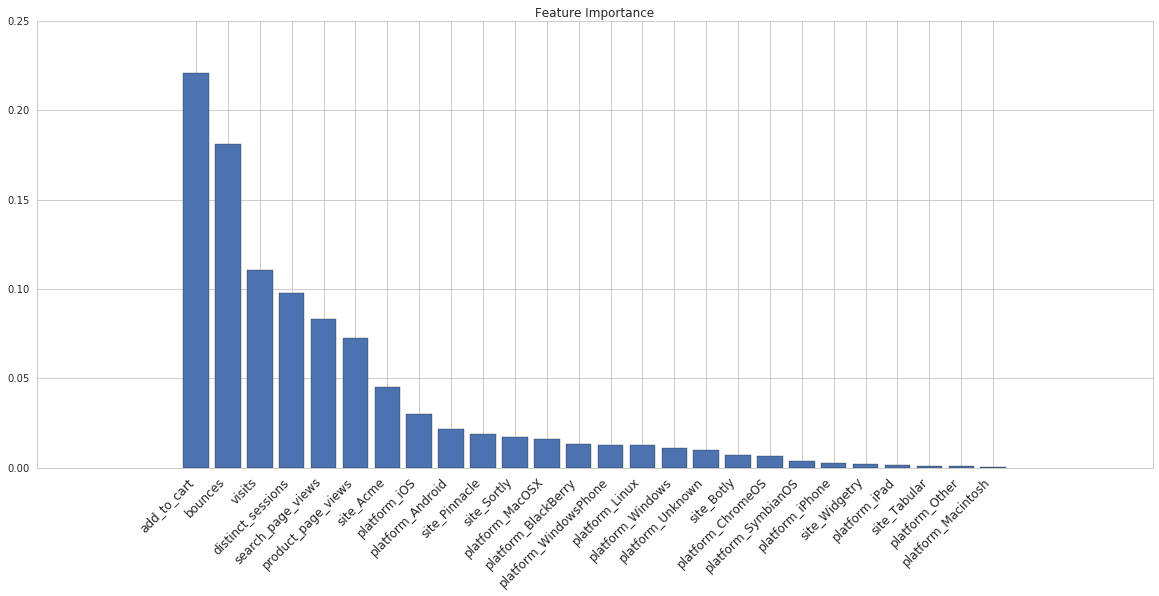

In [773]:
result = [['visits', 0.110918141383],
       ['distinct_sessions', 0.0977832788431],
       ['bounces', 0.181020366147],
       ['add_to_cart', 0.221031723688],
       ['product_page_views', 0.0727554168541],
       ['search_page_views', 0.0830286058698],
       ['site_Acme', 0.0450157682984],
       ['site_Botly', 0.00717242373143],
       ['site_Pinnacle', 0.0190112069858],
       ['site_Sortly', 0.0170003950998],
       ['site_Tabular', 0.00107385305649],
       ['site_Widgetry', 0.00178321567183],
       ['platform_Android', 0.0216986381949],
       ['platform_BlackBerry', 0.0131648660554],
       ['platform_ChromeOS', 0.00666632959425],
       ['platform_Linux', 0.0124577930803],
       ['platform_MacOSX', 0.0158908729822],
       ['platform_Macintosh', 0.000532775134246],
       ['platform_Other', 0.000909311163626],
       ['platform_SymbianOS', 0.00377138179412],
       ['platform_Unknown', 0.00970521626577],
       ['platform_Windows', 0.0110041314225],
       ['platform_WindowsPhone', 0.0124709041183],
       ['platform_iOS', 0.0298189894695],
       ['platform_iPad', 0.00172640767045],
       ['platform_iPhone', 0.00258798742493]]
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Feature Importance')
plt.show()

# Supervised Learning: Regression

In [613]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [628]:
data_reduce2 = data.drop(['day', 'visits', 'distinct_sessions', 'orders', 'bounces', 'add_to_cart',
                         'product_page_views', 'search_page_views', 'spent'],
                         axis=1, inplace=False)
feature_cols = list(data_reduce2.columns[:3])
target_col = data_reduce2.columns[3:] 
X_all = data_reduce2[feature_cols]
y1_all = data_reduce2[target_col[0]]
y2_all = data_reduce2[target_col[1]]
y3_all = data_reduce2[target_col[2]]
y4_all = data_reduce2[target_col[3]]
print target_col

Index([u'gross_sales', u'conversion_rate', u'bounce_rate',
       u'add_to_cart_rate'],
      dtype='object')


In [629]:
a = pd.get_dummies(X_all['site'], prefix='site')
b = pd.get_dummies(X_all['new_customer'], prefix='new_customer')
c = pd.get_dummies(X_all['platform'], prefix='platform')
X_all = pd.concat([X_all, a, b, c], axis=1)
X_all.drop(['site','new_customer','platform'], axis=1, inplace=True)
X_all.dtypes

site_Acme                 float64
site_Botly                float64
site_Pinnacle             float64
site_Sortly               float64
site_Tabular              float64
site_Widgetry             float64
new_customer_neither      float64
new_customer_new          float64
new_customer_returning    float64
platform_Android          float64
platform_BlackBerry       float64
platform_ChromeOS         float64
platform_Linux            float64
platform_MacOSX           float64
platform_Macintosh        float64
platform_Other            float64
platform_SymbianOS        float64
platform_Unknown          float64
platform_Windows          float64
platform_WindowsPhone     float64
platform_iOS              float64
platform_iPad             float64
platform_iPhone           float64
dtype: object

In [630]:
y1_all = pd.Series(preprocessing.robust_scale(y1_all.reshape(-1,1))[:,0], index=y1_all.index)
y2_all = pd.Series(preprocessing.robust_scale(y2_all.reshape(-1,1))[:,0], index=y2_all.index)
y3_all = pd.Series(preprocessing.robust_scale(y3_all.reshape(-1,1))[:,0], index=y3_all.index)
y4_all = pd.Series(preprocessing.robust_scale(y4_all.reshape(-1,1))[:,0], index=y4_all.index)

In [631]:
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (23 total features):
['site_Acme', 'site_Botly', 'site_Pinnacle', 'site_Sortly', 'site_Tabular', 'site_Widgetry', 'new_customer_neither', 'new_customer_new', 'new_customer_returning', 'platform_Android', 'platform_BlackBerry', 'platform_ChromeOS', 'platform_Linux', 'platform_MacOSX', 'platform_Macintosh', 'platform_Other', 'platform_SymbianOS', 'platform_Unknown', 'platform_Windows', 'platform_WindowsPhone', 'platform_iOS', 'platform_iPad', 'platform_iPhone']


In [632]:
train_index, test_index = next(iter(ShuffleSplit(y1_all.shape[0],test_size=0.25,random_state=seed)))
X_train, X_test = np.array(X_all)[train_index,:], np.array(X_all)[test_index,:]
y1_train, y1_test = y1_all[train_index], y1_all[test_index]
y2_train, y2_test = y2_all[train_index], y2_all[test_index]
y3_train, y3_test = y3_all[train_index], y3_all[test_index]
y4_train, y4_test = y4_all[train_index], y4_all[test_index]

print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 15795 samples.
Testing set has 5266 samples.


In [633]:
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    clf.fit(X_train, y_train)
    print "MSE score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "MSE score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
def predict_labels(clf, features, target):
    y_pred = clf.predict(features)
    return mean_squared_error(target, y_pred)

In [634]:
clf_A = ExtraTreesRegressor(random_state=seed)
clf_B = AdaBoostRegressor(random_state=seed)
clf_C = GradientBoostingRegressor(random_state=seed)
clf_D = Ridge(random_state=seed)
clf_E = SVR()

train_predict(clf_A, X_train, y4_train, X_test, y4_test)
train_predict(clf_B, X_train, y4_train, X_test, y4_test)
train_predict(clf_C, X_train, y4_train, X_test, y4_test)
train_predict(clf_D, X_train, y4_train, X_test, y4_test)
train_predict(clf_E, X_train, y4_train, X_test, y4_test)

Training a ExtraTreesRegressor using a training set size of 15795. . .
MSE score for training set: 0.0864.
MSE score for test set: 0.0967.
Training a AdaBoostRegressor using a training set size of 15795. . .
MSE score for training set: 0.2316.
MSE score for test set: 0.2367.
Training a GradientBoostingRegressor using a training set size of 15795. . .
MSE score for training set: 0.1042.
MSE score for test set: 0.1124.
Training a Ridge using a training set size of 15795. . .
MSE score for training set: 0.1872.
MSE score for test set: 0.1952.
Training a SVR using a training set size of 15795. . .
MSE score for training set: 0.1007.
MSE score for test set: 0.1092.


### Gross Sales Regression

In [641]:
parameters = {'n_estimators':(10,15,20,25,30),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4),
              'warm_start':(True,False)}

clf = ExtraTreesRegressor(random_state=seed)
score = make_scorer(mean_squared_error)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=10)
grid_obj = grid_obj.fit(X_train, y1_train)
clf = grid_obj.best_estimator_
print clf.get_params(), '\n'
print "Tuned model has a training MSE score of {:.4f}.".format(predict_labels(clf, X_train, y1_train))
print "Tuned model has a testing MSE score of {:.4f}.".format(predict_labels(clf, X_test, y1_test))
print np.stack((np.array(list(X_all.columns)), clf.feature_importances_.flatten()), axis=1)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  5.0min finished


{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 30, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 42, 'max_features': 'auto', 'max_depth': None} 

Tuned model has a training MSE score of 108.9130.
Tuned model has a testing MSE score of 175.6530.
[['site_Acme' '0.0742029322767']
 ['site_Botly' '3.43147116943e-05']
 ['site_Pinnacle' '0.00223797403082']
 ['site_Sortly' '0.00151890031696']
 ['site_Tabular' '0.00032741375765']
 ['site_Widgetry' '0.000133494631305']
 ['new_customer_neither' '0.0108938148175']
 ['new_customer_new' '0.0112458361295']
 ['new_customer_returning' '0.554724267794']
 ['platform_Android' '8.16415074644e-05']
 ['platform_BlackBerry' '6.52996398497e-06']
 ['platform_ChromeOS' '1.02597620904e-05']
 ['platform_Linux' '1.68926404046e-05']
 ['platform_MacOSX' '0.0907952627368']
 ['platform_Macintosh' '0.0157323865034']
 ['pl

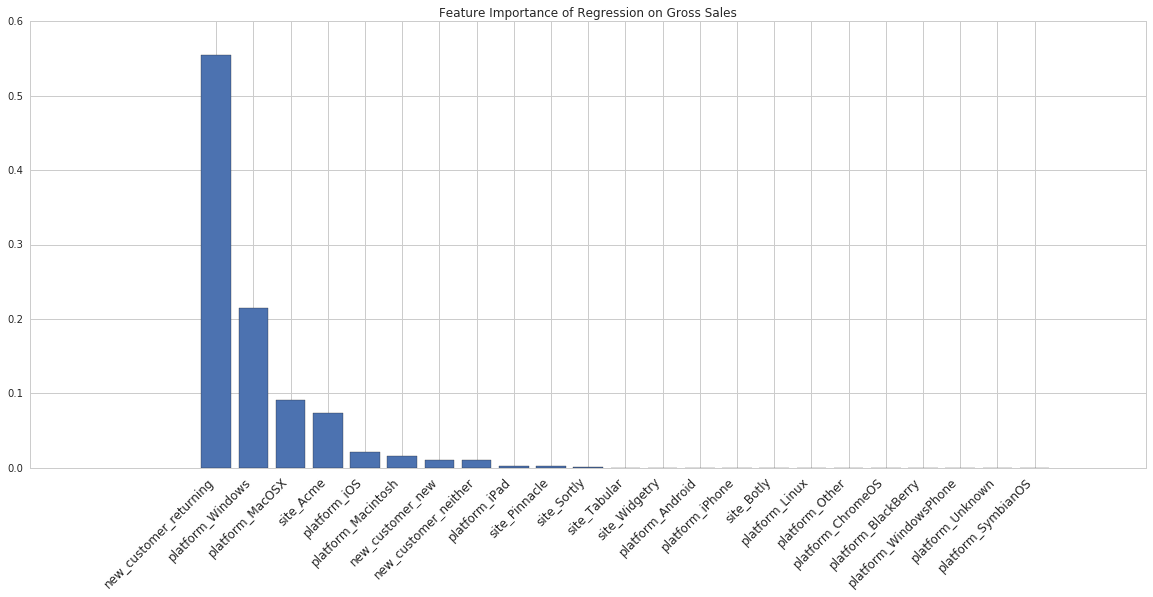

In [759]:
result = [['site_Acme', 0.0742029322767],
 ['site_Botly', 3.43147116943e-05],
 ['site_Pinnacle', 0.00223797403082],
 ['site_Sortly', 0.00151890031696],
 ['site_Tabular', 0.00032741375765],
 ['site_Widgetry', 0.000133494631305],
 ['new_customer_neither', 0.0108938148175],
 ['new_customer_new', 0.0112458361295],
 ['new_customer_returning', 0.554724267794],
 ['platform_Android', 8.16415074644e-05],
 ['platform_BlackBerry', 6.52996398497e-06],
 ['platform_ChromeOS', 1.02597620904e-05],
 ['platform_Linux', 1.68926404046e-05],
 ['platform_MacOSX', 0.0907952627368],
 ['platform_Macintosh', 0.0157323865034],
 ['platform_Other', 1.56654409107e-05],
 ['platform_SymbianOS', 6.43011991546e-09],
 ['platform_Unknown', 4.34053957751e-06],
 ['platform_Windows', 0.214648216178],
 ['platform_WindowsPhone', 5.71304741903e-06],
 ['platform_iOS', 0.0210766547715],
 ['platform_iPad', 0.00224890288935],
 ['platform_iPhone', 3.85791224357e-05]]
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Feature Importance of Regression on Gross Sales')
plt.show()

### Conversion Rate Regression

In [635]:
parameters = {'n_estimators':(10,15,20,25,30),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4),
              'warm_start':(True,False)}

clf = ExtraTreesRegressor(random_state=seed)
score = make_scorer(mean_squared_error)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=10)
grid_obj = grid_obj.fit(X_train, y2_train)
clf = grid_obj.best_estimator_
print clf.get_params(), '\n'
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y2_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y2_test))
print np.stack((np.array(list(X_all.columns)), clf.feature_importances_.flatten()), axis=1)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  4.5min finished


{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 25, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 42, 'max_features': 'auto', 'max_depth': None} 

Tuned model has a training F1 score of 0.1818.
Tuned model has a testing F1 score of 0.2176.
[['site_Acme' '0.0289105581663']
 ['site_Botly' '0.141817140032']
 ['site_Pinnacle' '0.00631809183262']
 ['site_Sortly' '0.00135751561671']
 ['site_Tabular' '0.135809846507']
 ['site_Widgetry' '0.131932469289']
 ['new_customer_neither' '0.0252484492369']
 ['new_customer_new' '0.347739486949']
 ['new_customer_returning' '0.0448861319767']
 ['platform_Android' '0.00224871662023']
 ['platform_BlackBerry' '0.0186645292078']
 ['platform_ChromeOS' '0.0024933119648']
 ['platform_Linux' '0.0114193284862']
 ['platform_MacOSX' '0.00856124804059']
 ['platform_Macintosh' '0.000994337083631']
 ['platform_Other' '0.0

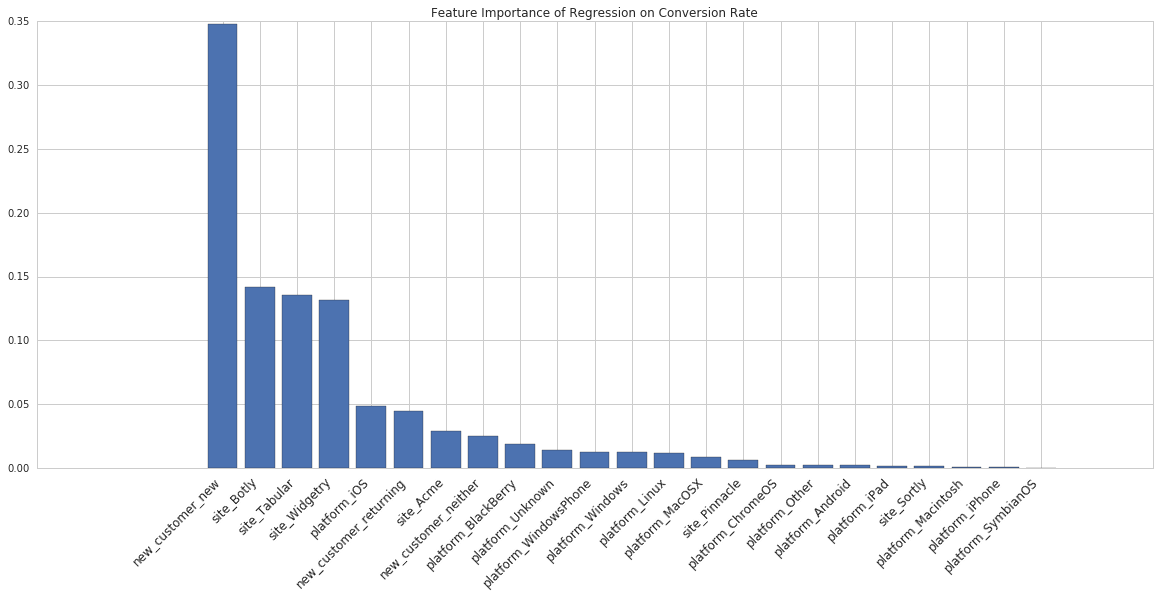

In [760]:
result = [['site_Acme', 0.0289105581663],
 ['site_Botly', 0.141817140032],
 ['site_Pinnacle', 0.00631809183262],
 ['site_Sortly', 0.00135751561671],
 ['site_Tabular', 0.135809846507],
 ['site_Widgetry', 0.131932469289],
 ['new_customer_neither', 0.0252484492369],
 ['new_customer_new', 0.347739486949],
 ['new_customer_returning', 0.0448861319767],
 ['platform_Android', 0.00224871662023],
 ['platform_BlackBerry', 0.0186645292078],
 ['platform_ChromeOS', 0.0024933119648],
 ['platform_Linux', 0.0114193284862],
 ['platform_MacOSX', 0.00856124804059],
 ['platform_Macintosh', 0.000994337083631],
 ['platform_Other', 0.00229438515307],
 ['platform_SymbianOS', 9.20181058856e-05],
 ['platform_Unknown', 0.0140172451284],
 ['platform_Windows', 0.0121194489316],
 ['platform_WindowsPhone', 0.0127749979089],
 ['platform_iOS', 0.0484440728667],
 ['platform_iPad', 0.0014763728953],
 ['platform_iPhone', 0.000380298000396]]
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Feature Importance of Regression on Conversion Rate')
plt.show()

### Bounce Rate Regression

In [639]:
parameters = {'n_estimators':(10,15,20,25,30),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4),
              'warm_start':(True,False)}

clf = ExtraTreesRegressor(random_state=seed)
score = make_scorer(mean_squared_error)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=10)
grid_obj = grid_obj.fit(X_train, y3_train)
clf = grid_obj.best_estimator_
print clf.get_params(), '\n'
print "Tuned model has a training MSE score of {:.4f}.".format(predict_labels(clf, X_train, y3_train))
print "Tuned model has a testing MSE score of {:.4f}.".format(predict_labels(clf, X_test, y3_test))
print np.stack((np.array(list(X_all.columns)), clf.feature_importances_.flatten()), axis=1)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  5.5min finished


{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': False, 'min_samples_leaf': 4, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 42, 'max_features': 'auto', 'max_depth': None} 

Tuned model has a training MSE score of 0.0762.
Tuned model has a testing MSE score of 0.0795.
[['site_Acme' '0.0454081312458']
 ['site_Botly' '0.010491695015']
 ['site_Pinnacle' '0.0374955634338']
 ['site_Sortly' '0.013289896468']
 ['site_Tabular' '0.0563611271703']
 ['site_Widgetry' '0.0686141716501']
 ['new_customer_neither' '0.564203303674']
 ['new_customer_new' '0.00237822136817']
 ['new_customer_returning' '0.0214039923135']
 ['platform_Android' '0.0232229463717']
 ['platform_BlackBerry' '0.00577582656669']
 ['platform_ChromeOS' '0.017775990789']
 ['platform_Linux' '0.0112723363556']
 ['platform_MacOSX' '0.0296223449057']
 ['platform_Macintosh' '0.00282501529419']
 ['platform_Other' '0.00

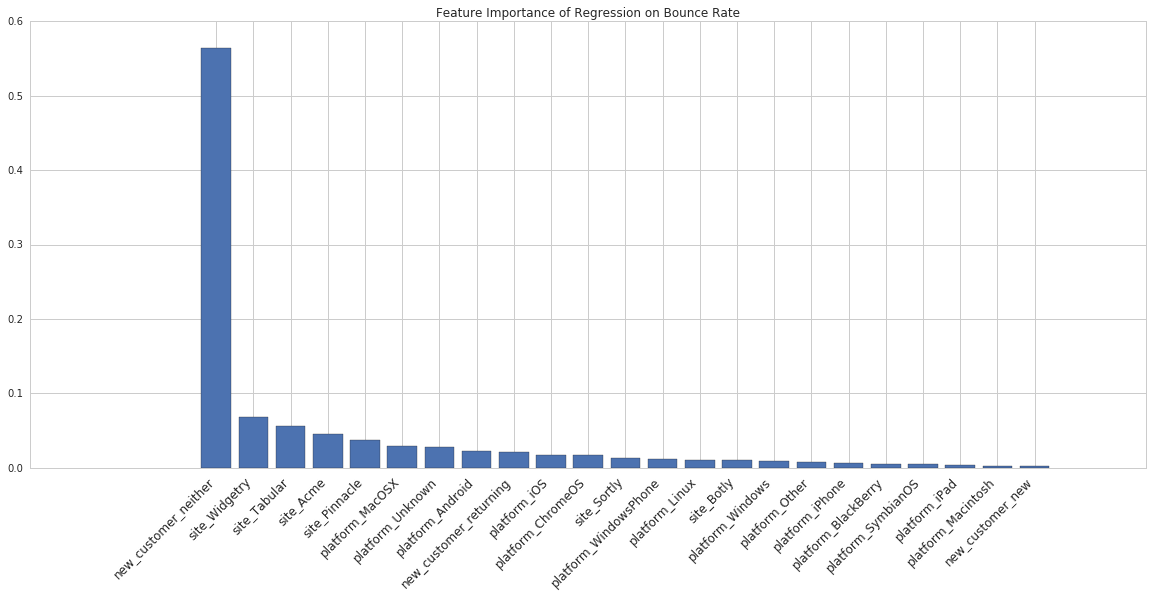

In [762]:
result = [['site_Acme', 0.0454081312458],
 ['site_Botly', 0.010491695015],
 ['site_Pinnacle', 0.0374955634338],
 ['site_Sortly', 0.013289896468],
 ['site_Tabular', 0.0563611271703],
 ['site_Widgetry', 0.0686141716501],
 ['new_customer_neither', 0.564203303674],
 ['new_customer_new', 0.00237822136817],
 ['new_customer_returning', 0.0214039923135],
 ['platform_Android', 0.0232229463717],
 ['platform_BlackBerry', 0.00577582656669],
 ['platform_ChromeOS', 0.017775990789],
 ['platform_Linux', 0.0112723363556],
 ['platform_MacOSX', 0.0296223449057],
 ['platform_Macintosh', 0.00282501529419],
 ['platform_Other', 0.00814950878298],
 ['platform_SymbianOS', 0.00530243517364],
 ['platform_Unknown', 0.0282740666222],
 ['platform_Windows', 0.00871864809791],
 ['platform_WindowsPhone', 0.0116739659559],
 ['platform_iOS', 0.0180002268882],
 ['platform_iPad', 0.00364009770144],
 ['platform_iPhone', 0.00610048815569]]
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Feature Importance of Regression on Bounce Rate')
plt.show()

### Add To Cart Rate Regression

In [640]:
parameters = {'n_estimators':(10,15,20,25,30),
              'min_samples_split':(2,3,4,5),
              'min_samples_leaf':(1,2,3,4),
              'warm_start':(True,False)}

clf = ExtraTreesRegressor(random_state=seed)
score = make_scorer(mean_squared_error)
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=10)
grid_obj = grid_obj.fit(X_train, y4_train)
clf = grid_obj.best_estimator_
print clf.get_params(), '\n'
print "Tuned model has a training MSE score of {:.4f}.".format(predict_labels(clf, X_train, y4_train))
print "Tuned model has a testing MSE score of {:.4f}.".format(predict_labels(clf, X_test, y4_test))
print np.stack((np.array(list(X_all.columns)), clf.feature_importances_.flatten()), axis=1)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:  5.6min finished


{'warm_start': True, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': 42, 'max_features': 'auto', 'max_depth': None} 

Tuned model has a training MSE score of 0.0864.
Tuned model has a testing MSE score of 0.0967.
[['site_Acme' '0.0254818575107']
 ['site_Botly' '0.11493052046']
 ['site_Pinnacle' '0.0167228040234']
 ['site_Sortly' '0.00413139102735']
 ['site_Tabular' '0.101442050266']
 ['site_Widgetry' '0.0984531086981']
 ['new_customer_neither' '0.370963382694']
 ['new_customer_new' '0.0']
 ['new_customer_returning' '0.122281736996']
 ['platform_Android' '0.00395009103779']
 ['platform_BlackBerry' '0.0224674526738']
 ['platform_ChromeOS' '0.00216835967597']
 ['platform_Linux' '0.0169900537693']
 ['platform_MacOSX' '0.00474994806987']
 ['platform_Macintosh' '0.00319068089208']
 ['platform_Other' '0.0042079577580

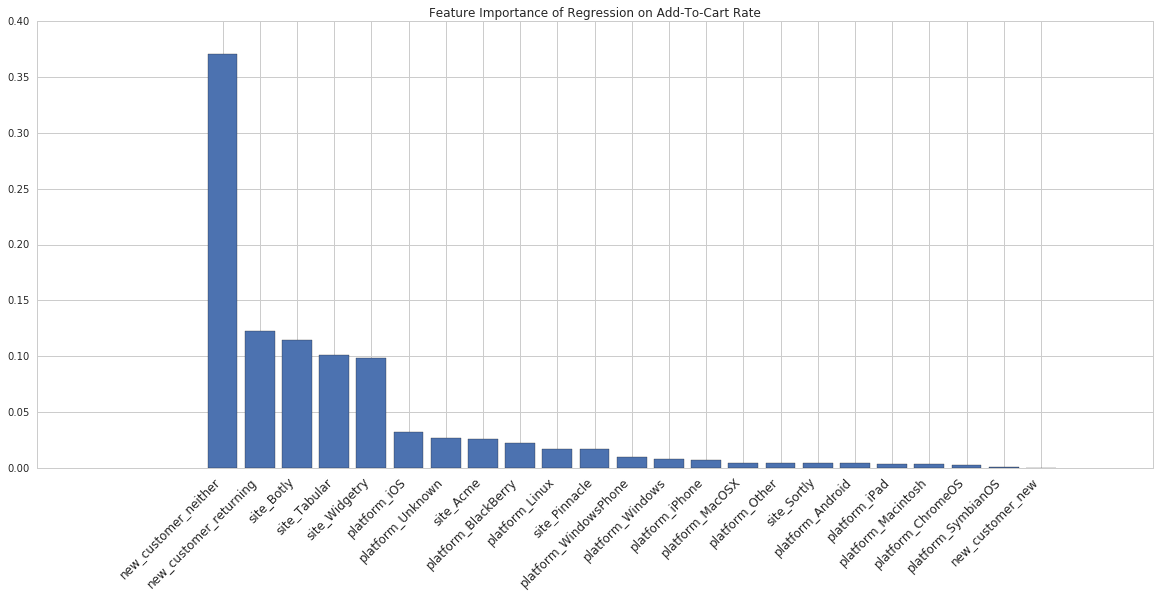

In [763]:
result = [['site_Acme', 0.0254818575107],
 ['site_Botly', 0.11493052046],
 ['site_Pinnacle', 0.0167228040234],
 ['site_Sortly', 0.00413139102735],
 ['site_Tabular', 0.101442050266],
 ['site_Widgetry', 0.0984531086981],
 ['new_customer_neither', 0.370963382694],
 ['new_customer_new', 0.0],
 ['new_customer_returning', 0.122281736996],
 ['platform_Android', 0.00395009103779],
 ['platform_BlackBerry', 0.0224674526738],
 ['platform_ChromeOS', 0.00216835967597],
 ['platform_Linux', 0.0169900537693],
 ['platform_MacOSX', 0.00474994806987],
 ['platform_Macintosh', 0.00319068089208],
 ['platform_Other', 0.00420795775809],
 ['platform_SymbianOS', 0.000532225956647],
 ['platform_Unknown', 0.0270703948859],
 ['platform_Windows', 0.00772763460603],
 ['platform_WindowsPhone', 0.00983999351034],
 ['platform_iOS', 0.0324475487871],
 ['platform_iPad', 0.00336280456642],
 ['platform_iPhone', 0.00688800213471]]
result_1 = [tuple(l) for l in result]
result_2 = sorted(result_1, key=lambda tup: tup[1], reverse=True)
result_3 = zip(*result_2)
rcParams['figure.figsize'] = 20, 8
figure = plt.figure()
plt.bar(range(len(result_3[1])),result_3[1],align='center')
plt.xticks(range(len(result_3[1])), result_3[0], size=12)
plt.setp(plt.xticks()[1], rotation=45, ha='right')
plt.title('Feature Importance of Regression on Add-To-Cart Rate')
plt.show()

# Unsupervised Learning

In [ ]:
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

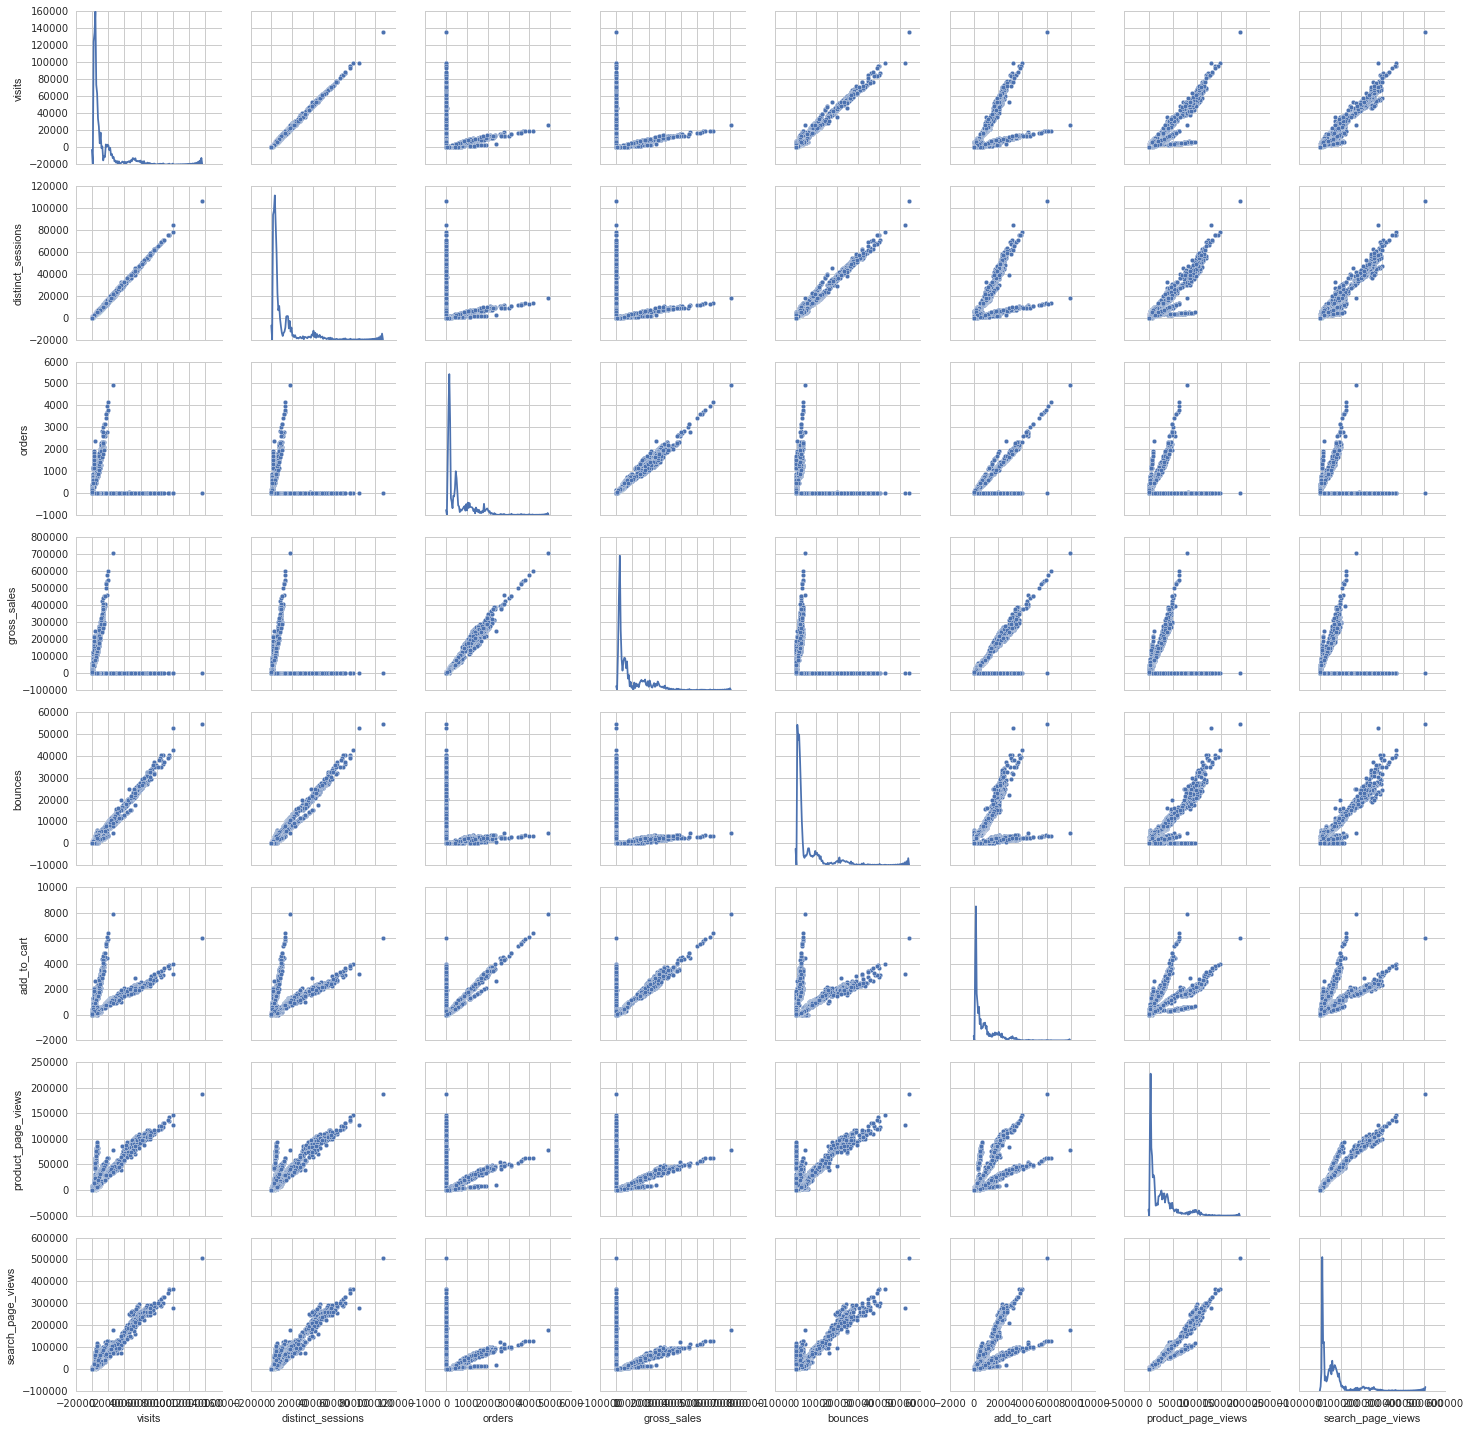

In [176]:
#mpl.rcParams.update(mpl.rcParamsDefault)
#%matplotlib inline

data_reduce = data.drop(['day', 'site', 'new_customer', 'platform',
                        'conversion_rate', 'bounce_rate', 'add_to_cart_rate'], axis=1, inplace=False)
g = sns.pairplot(data_reduce, diag_kind='kde')

In [181]:
indices = [1,11,98]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data_reduce.loc[indices], columns = data_reduce.keys()).reset_index(drop = True)
display(samples)

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views
0,0,0,0,13.0,0,0,1,0
1,58192,46312,0,0.0,23664,2285,104651,258511
2,13071,8957,1941,280774.0,1921,3438,40757,83392


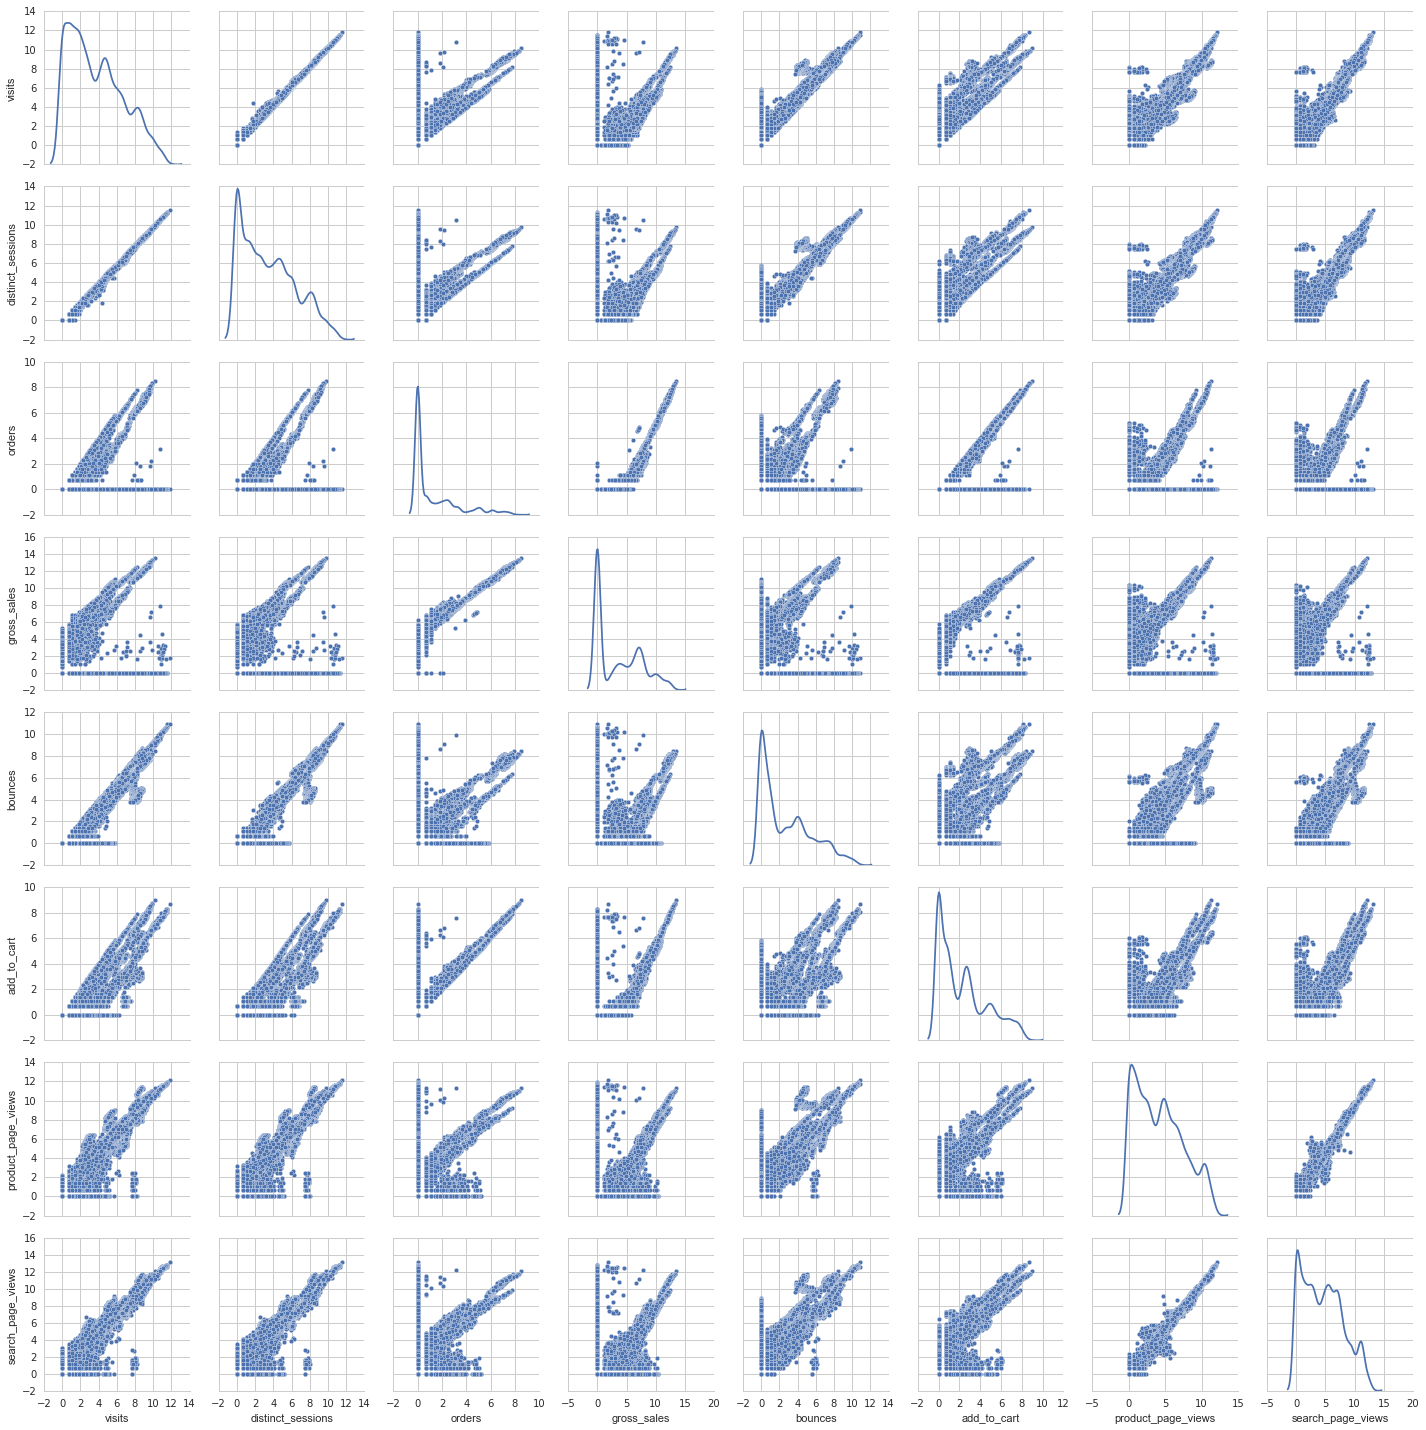

In [183]:
log_data = np.log(data_reduce + 1)
log_sample = np.log(samples + 1)

g = sns.pairplot(log_data, diag_kind='kde')

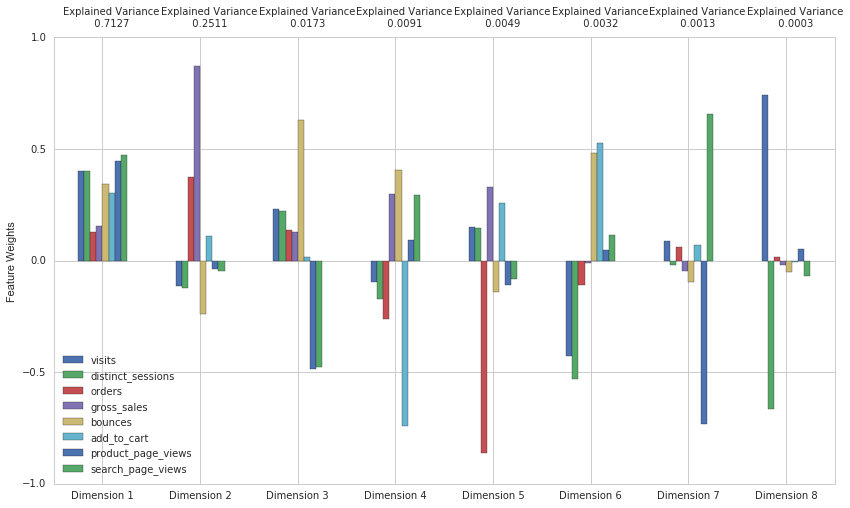

In [219]:
pca = PCA()
pca.fit(log_data)
pca_results = rs.pca_results(log_data, pca)
pca_samples = pca.transform(log_sample)

In [197]:
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8
0,-8.6740,0.3183,0.2164,-0.0561,0.2382,0.3746,-0.6094,-0.1701
1,16.2323,-7.1233,0.0292,-0.7407,0.8860,0.8924,0.0818,-0.0248
2,16.2061,7.7460,1.4101,-0.2829,-1.2781,0.2744,0.0527,-0.0023


In [238]:
pca = PCA(n_components=2)
pca.fit(log_data)

reduced_data = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
pca_samples = pca.transform(log_sample)

In [200]:
for i in [6,5,4,3,2]:
    gmm = GMM(n_components=i,covariance_type='diag',random_state=seed,verbose=0)
    clusterer = gmm.fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_

    score = silhouette_score(reduced_data,preds,metric='euclidean',random_state=seed)
    print "For {:d} clusters, the mean silhouette coefficient is {:.3f}.".format(i,score)

For 6 clusters, the mean silhouette coefficient is 0.478.
For 5 clusters, the mean silhouette coefficient is 0.466.
For 4 clusters, the mean silhouette coefficient is 0.468.
For 3 clusters, the mean silhouette coefficient is 0.507.
For 2 clusters, the mean silhouette coefficient is 0.408.


In [203]:
for i in [6,5,4,3,2]:
    kmeans = KMeans(n_clusters=i,random_state=seed,verbose=0)
    clusterer = kmeans.fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.cluster_centers_ 

    score = silhouette_score(reduced_data,preds,metric='euclidean',random_state=seed)
    print "For {:d} clusters, the mean silhouette coefficient is {:.3f}.".format(i,score)

For 6 clusters, the mean silhouette coefficient is 0.511.
For 5 clusters, the mean silhouette coefficient is 0.524.
For 4 clusters, the mean silhouette coefficient is 0.495.
For 3 clusters, the mean silhouette coefficient is 0.543.
For 2 clusters, the mean silhouette coefficient is 0.481.


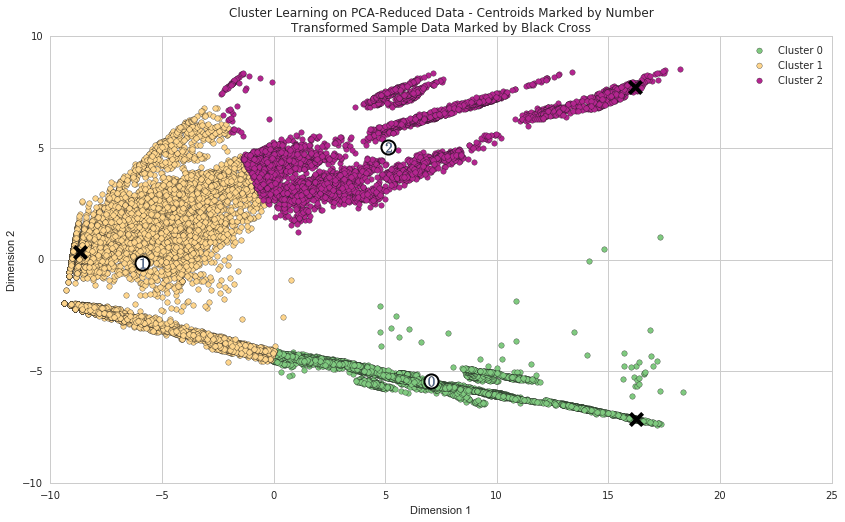

In [665]:
kmeans = KMeans(n_clusters=3,random_state=seed,verbose=0)
clusterer = kmeans.fit(reduced_data)
preds = clusterer.predict(reduced_data)
sample_preds = clusterer.predict(pca_samples)
centers = clusterer.cluster_centers_ 
rs.cluster_results(reduced_data, preds, centers, pca_samples)

,visits,distinct_sessions,orders,gross_sales,bounces,add_to_cart,product_page_views,search_page_views
Segment 0,1419.0,1134.0,0.0,-0.0,653.0,48.0,2004.0,3625.0
Segment 1,3.0,2.0,1.0,12.0,1.0,1.0,4.0,5.0
Segment 2,193.0,140.0,43.0,6630.0,26.0,84.0,579.0,893.0


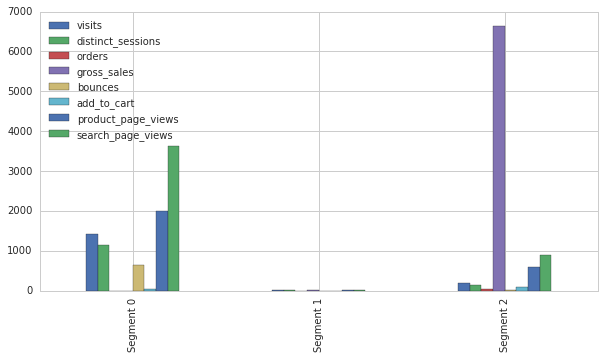

In [207]:
log_centers = pca.inverse_transform(centers)
true_centers = np.exp(log_centers) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data_reduce.keys())
true_centers.index = segments
display(true_centers)
true_centers.plot(kind = 'bar', figsize = (10, 5))

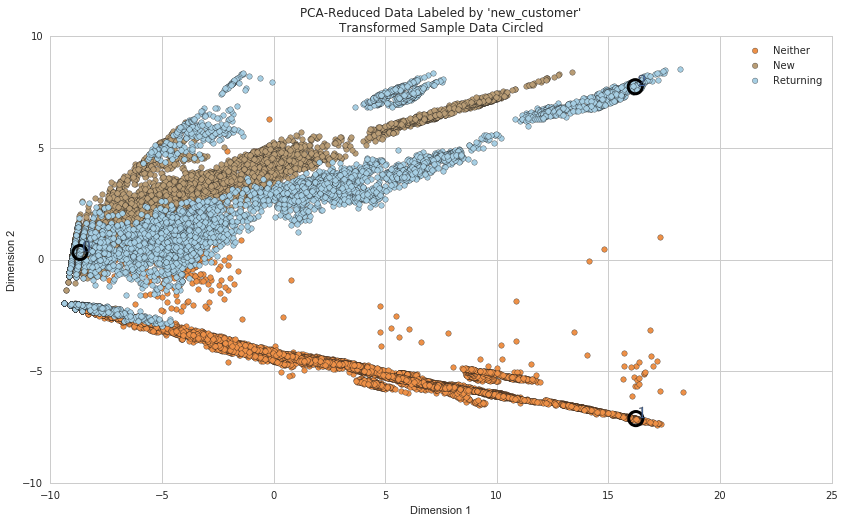

In [663]:
reload(rs) 
rs.channel_results(reduced_data, data, pca_samples)

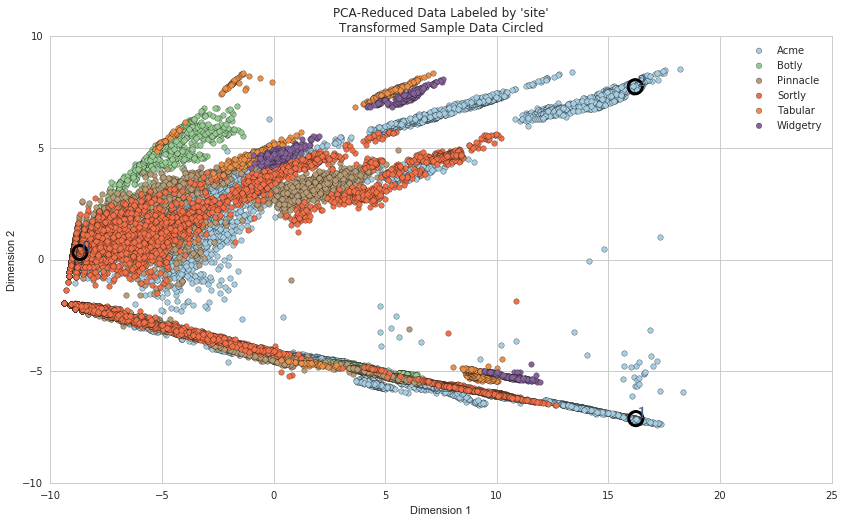

In [666]:
reload(rs) 
rs.site_results(reduced_data, data, pca_samples)

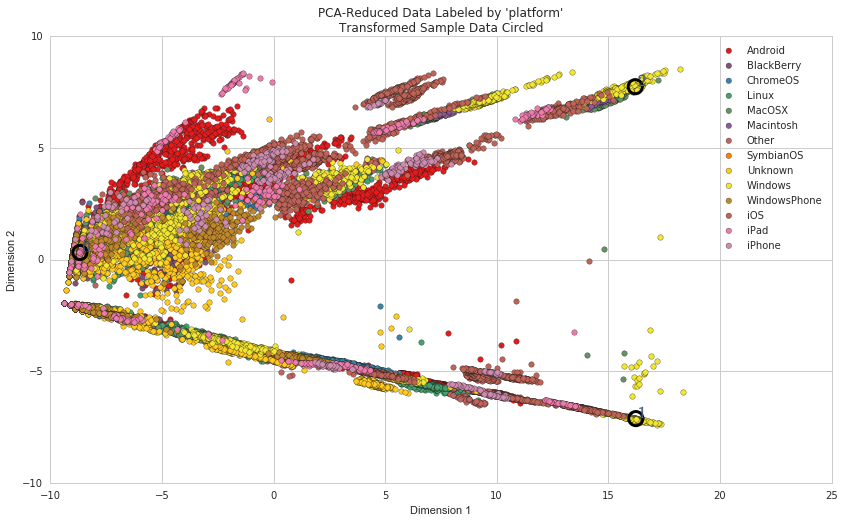

In [674]:
reload(rs) 
rs.platform_results(reduced_data, data, pca_samples)